In [3]:
import numpy as np, pandas as pd
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
gostars = Table.read('data/gaia_ostars.fits')

In [36]:
o_df = gostars.to_pandas()

Text(0.5,0,'D')

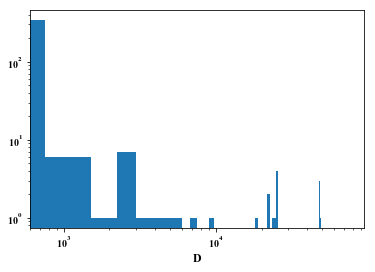

In [37]:
plt.hist(o_df['astrometric_excess_noise_sig'],bins=100);
plt.yscale('log')
plt.xscale('log')
plt.xlabel('D')

/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


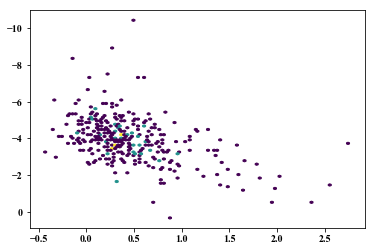

In [38]:
naiv_dist_pc = 1.0e3 / o_df['parallax']
MG = o_df['phot_g_mean_mag'] - 5*np.log10(naiv_dist_pc) + 5
MV = o_df['vmag4']- 5*np.log10(naiv_dist_pc) + 5
plt.hexbin(o_df['phot_bp_mean_mag']-o_df['phot_rp_mean_mag'],MG,mincnt=1)
plt.gca().invert_yaxis()

Text(0,0.5,'J-H')

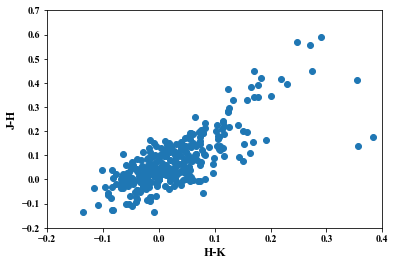

In [56]:
plt.scatter(o_df['hmag3']-o_df['kmag3'],o_df['jmag3']-o_df['hmag3'])
plt.xlim(-0.2,0.4)
plt.ylim(-0.2,0.7)
plt.xlabel('H-K')
plt.ylabel('J-H')

Text(0,0.5,'V-J')

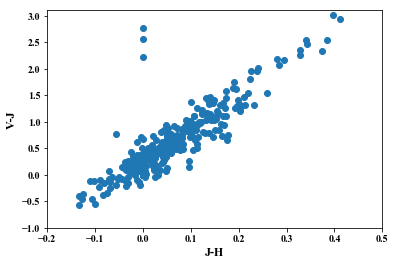

In [59]:
plt.scatter(o_df['jmag3']-o_df['hmag3'],o_df['vmag4']-o_df['jmag3'])
plt.xlim(-0.2,0.5)
plt.ylim(-1,3.1)
plt.xlabel('J-H')
plt.ylabel('V-J')

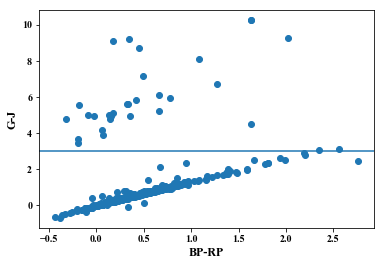

In [69]:
plt.scatter(o_df['phot_bp_mean_mag']-o_df['phot_rp_mean_mag'],o_df['phot_g_mean_mag']-o_df['jmag3'])
plt.xlabel('BP-RP')
plt.ylabel('G-J')
plt.axhline(y=3)

In [70]:
o_weird = o_df[o_df['phot_g_mean_mag']-o_df['jmag3'] >= 3]

/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


Text(0,0.5,'M_G')

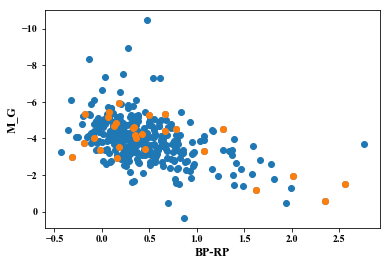

In [74]:
plt.scatter(o_df['phot_bp_mean_mag']-o_df['phot_rp_mean_mag'],o_df['phot_g_mean_mag'] - 5*np.log10(naiv_dist_pc) + 5)
plt.scatter(o_weird['phot_bp_mean_mag']-o_weird['phot_rp_mean_mag'],o_weird['phot_g_mean_mag'] - 5*np.log10(naiv_dist_pc[o_df['phot_g_mean_mag']-o_df['jmag3'] >= 3]) + 5)
plt.gca().invert_yaxis()
plt.xlabel('BP-RP')
plt.ylabel('M_G')

/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


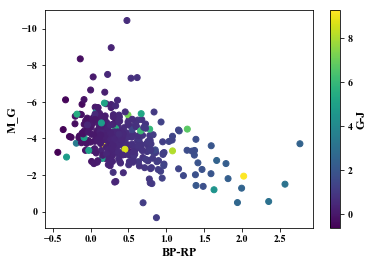

In [80]:
plt.scatter(o_df['phot_bp_mean_mag']-o_df['phot_rp_mean_mag'],o_df['phot_g_mean_mag'] - 5*np.log10(naiv_dist_pc) + 5,c=o_df['phot_g_mean_mag']-o_df['jmag3'])
plt.gca().invert_yaxis()
plt.xlabel('BP-RP')
plt.ylabel('M_G')
plt.colorbar(label='G-J')

/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


Text(0,0.5,'M_G')

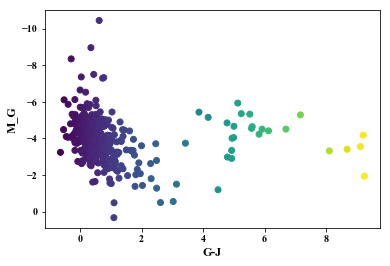

In [81]:
plt.scatter(o_df['phot_g_mean_mag']-o_df['jmag3'],o_df['phot_g_mean_mag'] - 5*np.log10(naiv_dist_pc) + 5,c=o_df['phot_g_mean_mag']-o_df['jmag3'])
plt.gca().invert_yaxis()
plt.xlabel('G-J')
plt.ylabel('M_G')